# Visualizations
Note the locations and files are assumed to be at the Ohio Supercomputer Center.

In [24]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import os

ddir='/users/PCON0003/cond0088/Projects/detectors/sw_outputs/PaperIV_chargediffusion'
t='chris_20829vis_fid1_visinfo.npy'
data=np.load(os.path.join(ddir,t))
t2='ami_20828vis_fid1_visinfo.npy'
data2=np.load(os.path.join(ddir,t2))
t3='ami_20663vis_fid1_visinfo.npy'
data3=np.load(os.path.join(ddir,t3))
det_labels=['20829','20828','20663']

def hist_param(dataf,ncol,nx=32,ny=32,nbins=30,figsize=(8,8)):
    # Need to write the bit that takes ncol and associates it to a dictionary with name
    # Currently we can reference the information below
    param=dataf[:,:,ncol].reshape(ny,nx)
    flatparam=param.ravel() # Fix this (unnecessary)
    plt.figure()
    plt.hist(flatparam[~np.isnan(flatparam)],nbins)
    plt.figure(figsize=figsize)
    plt.imshow(param,origin='lower')
    plt.colorbar()
    return param,flatparam

The shape of the ```data``` array is ny * nx * ncol where there are a total of ny * nx superpixels and the ncol are defined below: 
```
# columns  0 .. 24 are the visible BFE kernel in e^-1 (order: dy=-2 dx=-2; dy=-2 dx=-1; dy=-2 dx=0; ...)
# columns 25 .. 49 are the visible Phi kernel (order: dy=-2 dx=-2; dy=-2 dx=-1; dy=-2 dx=0; ...)
# column 50 is the quantum yield omega parameter
# column 51 is Cxx charge diffusion in pixels^2
# column 52 is Cxy charge diffusion in pixels^2
# column 53 is Cyy charge diffusion in pixels^2
# column 54 is visible current Ie (e per frame)
# column 55 is number of iterations in p2 kernel
```

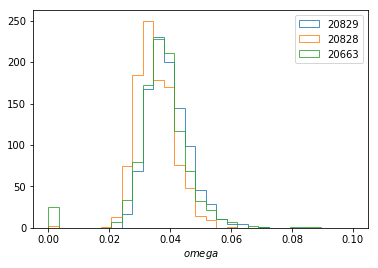

<Figure size 432x288 with 0 Axes>

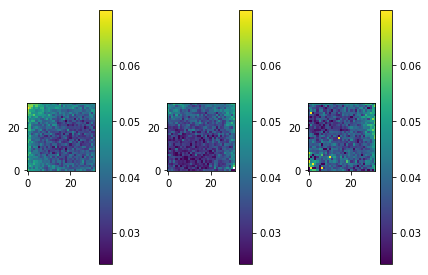

In [42]:
# Look at the omega parameter
om=data[:,:,50]
flatom=om.ravel()
om2=data2[:,:,50]
flatom2=om2.ravel()
om3=data3[:,:,50]
flatom3=om3.ravel()
num_bins=30
#plt.hist(flatom[~np.isnan(flatom)])
# Looks like there are some nan values that prevent hist from working automatically
plt.hist(flatom,bins=np.linspace(0, 0.1, num=num_bins),alpha=0.8,histtype='step',label=det_labels[0])
plt.hist(flatom2,bins=np.linspace(0, 0.1, num=num_bins),alpha=0.8,histtype='step',label=det_labels[1])
plt.hist(flatom3,bins=np.linspace(0, 0.1, num=num_bins),alpha=0.8,histtype='step',label=det_labels[2])
plt.xlabel('$omega$')
plt.legend()

plt.figure()
fig, axs = plt.subplots(nrows=1, ncols=3)
im1=axs[0].imshow(om,origin='lower')
fig.colorbar(im1, ax=axs[0])
# Get the range from the first detector because there are outliers, esp in 20663
vmin1, vmax1 = im1.get_clim()
im2=axs[1].imshow(om2,origin='lower',vmin=vmin1,vmax=vmax1)
fig.colorbar(im2, ax=axs[1])
im3=axs[2].imshow(om3,origin='lower',vmin=vmin1,vmax=vmax1)
fig.colorbar(im3, ax=axs[2])
plt.tight_layout()

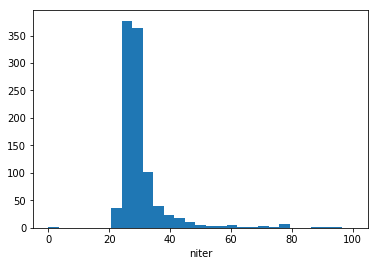

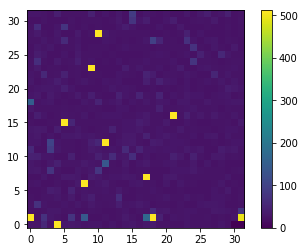

In [16]:
# iterations in the p2 kernel
nit=data[:,:,55]
flatnit=nit.ravel()
num_bins=30
plt.hist(flatnit,bins=np.linspace(0, 100, num=num_bins))
plt.xlabel('niter')
plt.figure()
plt.imshow(nit,origin='lower')
plt.colorbar()

Text(0.5,0,'charge diffusion component in pixels$^2$')

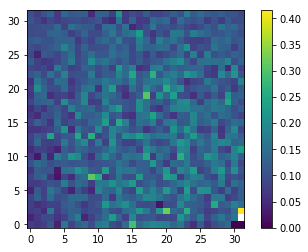

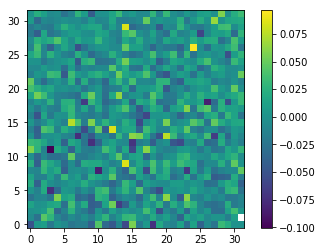

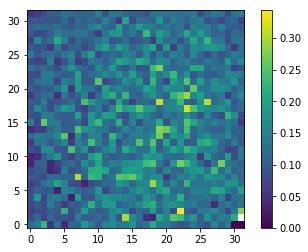

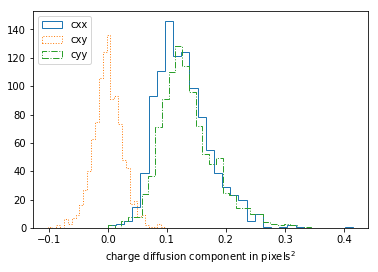

In [17]:
# Charge diffusion parameters
cxx=data[:,:,51]
cxy=data[:,:,52]
cyy=data[:,:,53]
flatcxx=cxx.ravel()
flatcxy=cxy.ravel()
flatcyy=cyy.ravel()
# There is/are 1 nan vals for cxx and cyy, and 2 for cxy
flatcxx_nan=np.isnan(flatcxx)
flatcxy_nan=np.isnan(flatcxy) 
flatcyy_nan=np.isnan(flatcyy)

plt.imshow(cxx,origin='lower')
plt.colorbar()
plt.figure()
plt.imshow(cxy,origin='lower')
plt.colorbar()
plt.figure()
plt.imshow(cyy,origin='lower')
plt.colorbar()

# We could also plot the histograms of these to compare the distributions
plt.figure()
plt.hist(flatcxx[~flatcxx_nan],30,histtype='step',label='cxx',ls='-')
plt.hist(flatcxy[~flatcxy_nan],30,histtype='step',label='cxy',ls=':')
plt.hist(flatcyy[~flatcyy_nan],30,histtype='step',label='cyy',ls='-.')
plt.legend()
plt.xlabel('charge diffusion component in pixels$^2$')

[[0.10655859 0.00013096]
 [0.00013096 0.11355799]]
(32, 32)


(-1, 32)

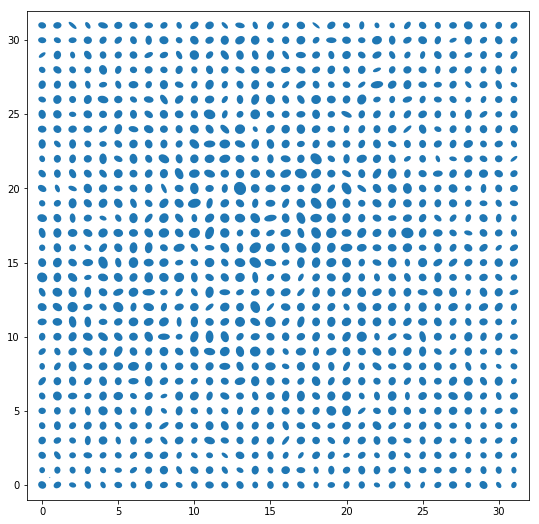

In [5]:
# Function adapted from
# https://www.programcreek.com/python/example/61396/matplotlib.patches.Ellipse
from matplotlib.patches import Ellipse
def plot_cov_ellipse(cov, pos, nstd=1, ax=None, **kwargs):
    """
    Plots an `nstd` sigma error ellipse based on the specified covariance
    matrix (`cov`). Additional keyword arguments are passed on to the 
    ellipse patch artist.

    Parameters
    ----------
        cov : The 2x2 covariance matrix to base the ellipse on
        pos : The location of the center of the ellipse. Expects a 2-element
            sequence of [x0, y0].
        nstd : The radius of the ellipse in numbers of standard deviations.
            Defaults to 2 standard deviations.
        ax : The axis that the ellipse will be plotted on. Defaults to the 
            current axis.
        Additional keyword arguments are pass on to the ellipse patch.

    Returns
    -------
        A matplotlib ellipse artist
    """
    def eigsorted(cov):
        vals, vecs = np.linalg.eigh(cov)
        order = vals.argsort()[::-1]
        return vals[order], vecs[:,order]

    if ax is None:
        ax = plt.gca()
        
    vals, vecs = eigsorted(cov)
    theta = np.degrees(np.arctan2(*vecs[:,0][::-1]))

    # Width and height are "full" widths, not radius
    width, height = 2 * nstd * np.sqrt(vals)
    ellip = Ellipse(xy=pos, width=width, height=height, angle=theta, **kwargs)

    ax.add_artist(ellip)
    return ellip 
# Construct the mean cov
pos=[0.5,0.5]
mean_cov=np.zeros((2,2))
mean_cov[0,0]=np.mean(flatcxx[~flatcxx_nan])
mean_cov[1,0]=mean_cov[0,1]=np.mean(flatcxy[~flatcxy_nan])
mean_cov[1,1]=np.mean(flatcyy[~flatcyy_nan])
fig, axs = plt.subplots(1, 1, figsize=(9, 9))
plot_cov_ellipse(mean_cov, pos, nstd=0.1, ax=axs)
print(mean_cov)
# Grid of covs for each superpixel
print(cxx.shape)
for idx in range(cxx.shape[0]):
    for jdx in range(cxx.shape[1]):
        meancov=np.zeros((2,2))
        mean_cov[0,0]=cxx[jdx][idx]
        mean_cov[1,0]=mean_cov[0,1]=cxy[jdx][idx]
        mean_cov[1,1]=cyy[jdx][idx]
        plot_cov_ellipse(mean_cov, [jdx,idx], nstd=0.8, ax=axs)
axs.set_xlim(-1,32)
axs.set_ylim(-1,32)

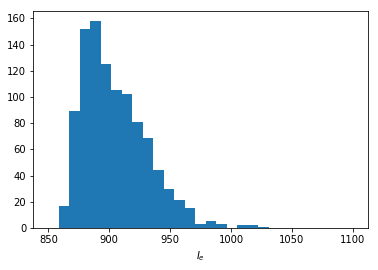

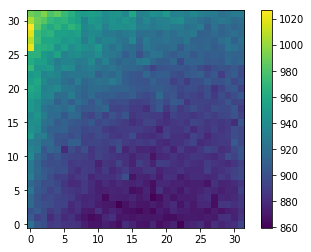

In [6]:
# Look at the Ie parameter
ie=data[:,:,54]
flatie=ie.ravel()
num_bins=30
#plt.hist(flatie[~np.isnan(flatie)])
# Looks like there are some nan values that prevent hist from working automatically
plt.hist(flatie,bins=np.linspace(850, 1100, num=num_bins))
plt.xlabel('$I_e$')
plt.figure()
plt.imshow(ie,origin='lower')
plt.colorbar()

## BFE IR vs visible

In [7]:
ir_file = 'chris_20829vis_fid1_summary.txt'

ir_cols = ['superX','superY','goodpix','raw_gain','gain_alpha','gain_alphabeta',
                'alphaH','alphaV','betaNL','q_per_t','alphaD','cH','cV',
                'bfe_IR(-2,-2)','bfe_IR(-1,-2)','bfe_IR(0,-2)','bfe_IR(1,-2)','bfe_IR(2,-2)',
                'bfe_IR(-2,-1)', 'bfe_IR(-1,-1)','bfe_IR(0,-1)','bfe_IR(1,-1)','bfe_IR(2,-1)',
                'bfe_IR(-2,0)','bfe_IR(-1,0)','bfe_IR(0,0)','bfe_IR(1,0)','bfe_IR(2,0)',
                'bfe_IR(-2,1)','bfe_IR(-1,1)','bfe_IR(0,1)','bfe_IR(1,1)','bfe_IR(2,1)',
                'bfe_IR(-2,2)','bfe_IR(-1,2)','bfe_IR(0,2)','bfe_IR(1,2)','bfe_IR(2,2)',
                't_intercept','beta2','beta3','beta4']

table_ir = pd.read_table(ddir+'/'+ir_file,delim_whitespace=True,index_col=(0,1),names=ir_cols,comment='#')

In [8]:
vis_file = 'chris_20829vis_fid1_visinfo.txt'

vis_cols = ['bfevis(-2,-2)','bfevis(-1,-2)','bfevis(0,-2)','bfevis(1,-2)','bfevis(2,-2)',
                'bfevis(-2,-1)', 'bfevis(-1,-1)','bfevis(0,-1)','bfevis(1,-1)','bfevis(2,-1)',
                'bfevis(-2,0)','bfevis(-1,0)','bfevis(0,0)','bfevis(1,0)','bfevis(2,0)',
                'bfevis(-2,1)','bfevis(-1,1)','bfevis(0,1)','bfevis(1,1)','bfevis(2,1)',
                'bfevis(-2,2)','bfevis(-1,2)','bfevis(0,2)','bfevis(1,2)','bfevis(2,2)',
                'phi(-2,-2)','phi(-1,-2)','phi(0,-2)','phi(1,-2)','phi(2,-2)',
                'phi(-2,-1)', 'phi(-1,-1)','phi(0,-1)','phi(1,-1)','phi(2,-1)',
                'phi(-2,0)','phi(-1,0)','phi(0,0)','phi(1,0)','phi(2,0)',
                'phi(-2,1)','phi(-1,1)','phi(0,1)','phi(1,1)','phi(2,1)',
                'phi(-2,2)','phi(-1,2)','phi(0,2)','phi(1,2)','phi(2,2)',
                'omega','Cxx','Cxy','Cyy','Ie','p2iter']

table_vis = pd.read_table(ddir+'/'+vis_file,delim_whitespace=True,index_col=(0,1),names=vis_cols,comment='#')

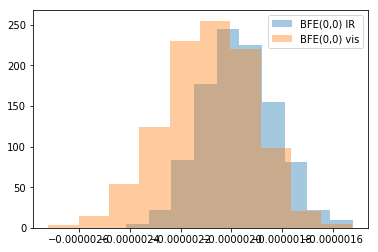

In [9]:
f, ax=plt.subplots(1, 1)
ax.hist(table_ir['bfe_IR(0,0)'].ravel(), label='BFE(0,0) IR', alpha=0.4)
ax.hist(table_vis['bfevis(0,0)'].ravel(), label='BFE(0,0) vis', alpha=0.4)
ax.ticklabel_format(style='sci')
plt.legend()

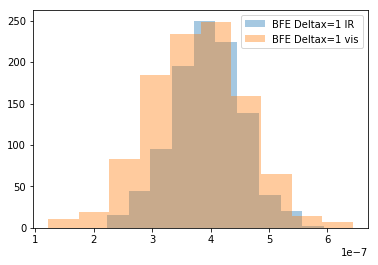

In [10]:
f, ax=plt.subplots(1, 1)
table_ir['bfe_IR_1'] = (table_ir['bfe_IR(0,1)']+table_ir['bfe_IR(0,-1)']
                    + table_ir['bfe_IR(1,0)']+table_ir['bfe_IR(-1,0)'])/4.0
table_vis['bfevis_1'] = (table_vis['bfevis(0,1)']+table_vis['bfevis(0,-1)']
                    + table_vis['bfevis(1,0)']+table_vis['bfevis(-1,0)'])/4.0
ax.hist(table_ir['bfe_IR_1'].ravel(), label='BFE Deltax=1 IR', alpha=0.4)
ax.hist(table_vis['bfevis_1'].ravel(), label='BFE Deltax=1 vis', alpha=0.4)
ax.ticklabel_format(style='sci')
plt.legend()

## Let's look at some of Chris's runs with different dimensions of superpixels
```grep -r "NBIN: 128 8" *config.txt``` from within the directory ```/users/PCON0003/cond0088/Projects/detectors/sw_outputs/PaperIV_chargediffusion``` shows that test14 and test16 both have this configuration of superpixels.  Looks like the difference is that test16 includes a bunch of "second" in the sequence flats (and also the results are not available as of Jan 7 4pm)

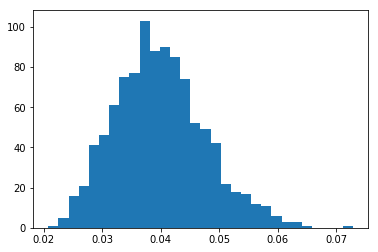

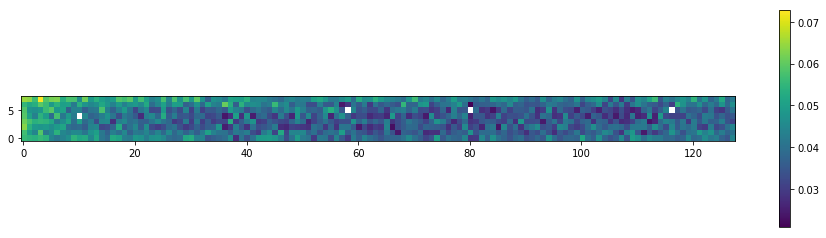

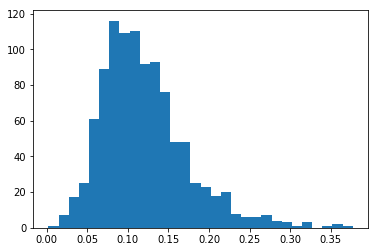

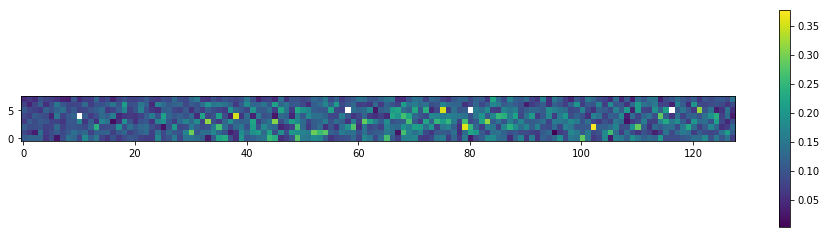

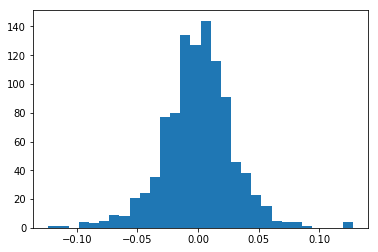

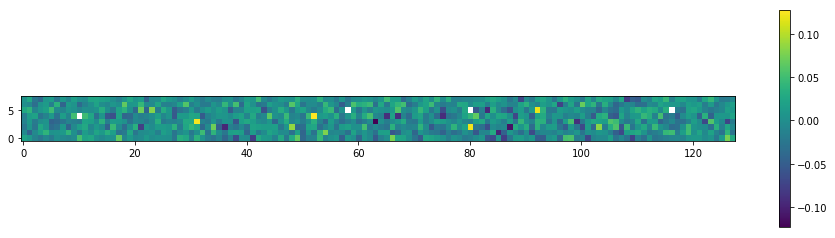

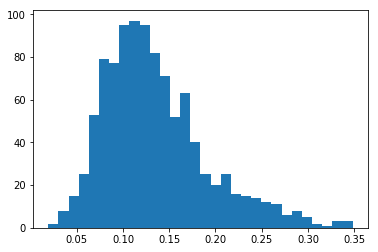

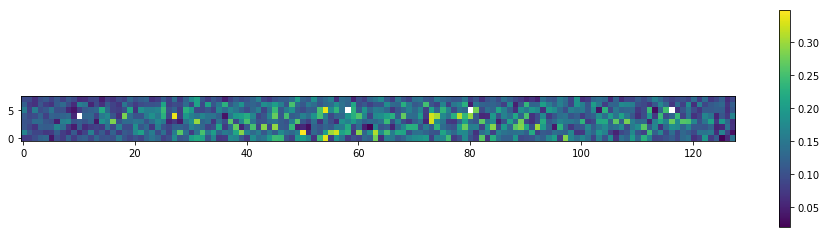

In [11]:
t_test14='chris_20829vis_test14_visinfo.npy'
d_test14=np.load(os.path.join(ddir,t_test14))
# omega
om,flatom=hist_param(d_test14,50,nx=128,ny=8,nbins=30,figsize=(16,4))
# cxx, cxy, cyy
cxx,flatcxx=hist_param(d_test14,51,nx=128,ny=8,figsize=(16,4))
cxy,flatcxy=hist_param(d_test14,52,nx=128,ny=8,figsize=(16,4))
cyy,flatcyy=hist_param(d_test14,53,nx=128,ny=8,figsize=(16,4))

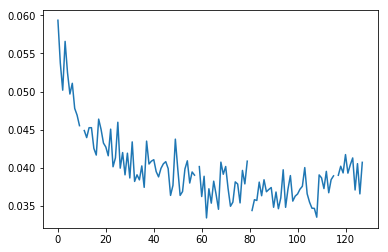

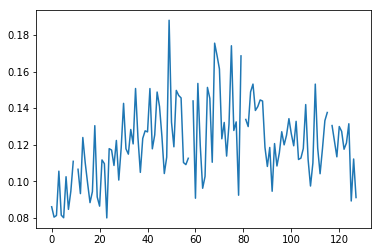

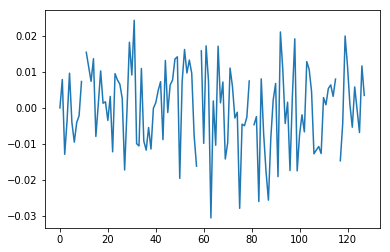

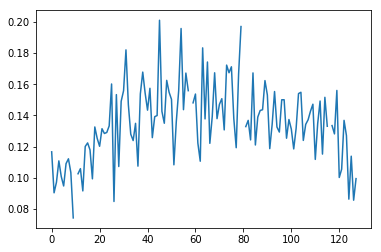

In [12]:
# Collapse in one dimension to see if there are any features that stand out

plt.plot(om.mean(axis=0))
plt.figure()
plt.plot(cxx.mean(axis=0))
plt.figure()
plt.plot(cxy.mean(axis=0))
plt.figure()
plt.plot(cyy.mean(axis=0))